# Prior Training

In [9]:
%load_ext autoreload
%autoreload 2
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
db = ["HAM"]
models = ["RES", "DENSE", "MOBILE"]
root = f"../../dataset/CAI 2025/{db[0]}/"

filepaths = {}
for i in range(len(models)):
    filepaths[models[i]] = f"{root}eval/df_valid_{models[i]}.csv"

df = pd.DataFrame()
for k, v in filepaths.items():
    tmp = pd.read_csv(v)
    tmp["model"] = k
    tmp["db"] = db[0]
    df = pd.concat([df, tmp])

In [11]:
df["accuracy"] = 0
df.loc[df["label"] == df["pred"], "accuracy"] = 1

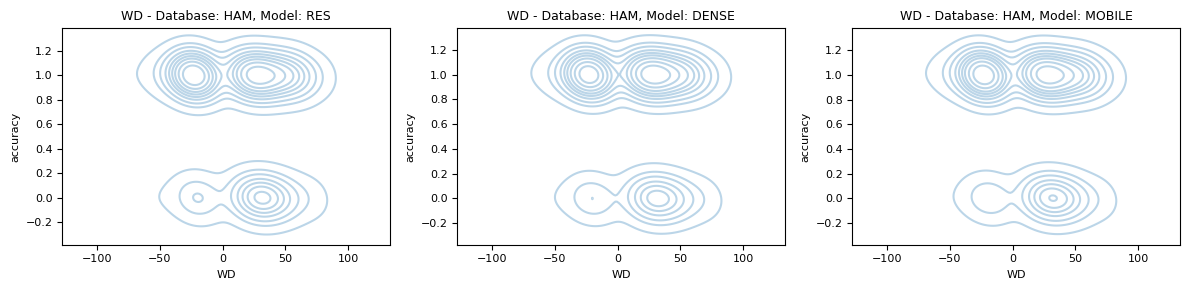

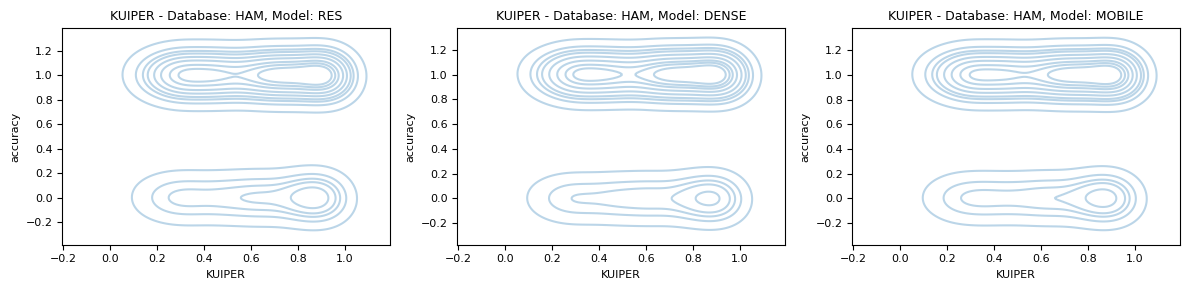

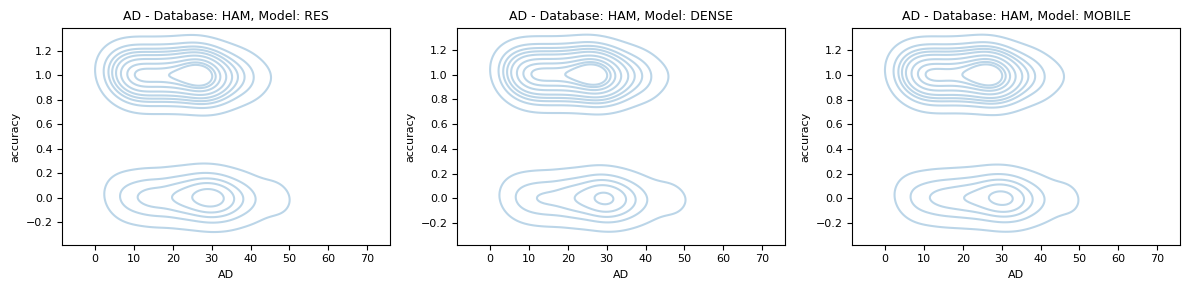

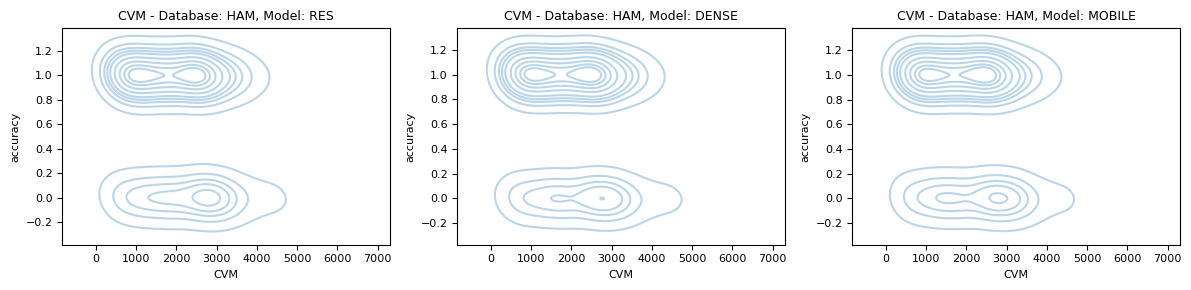

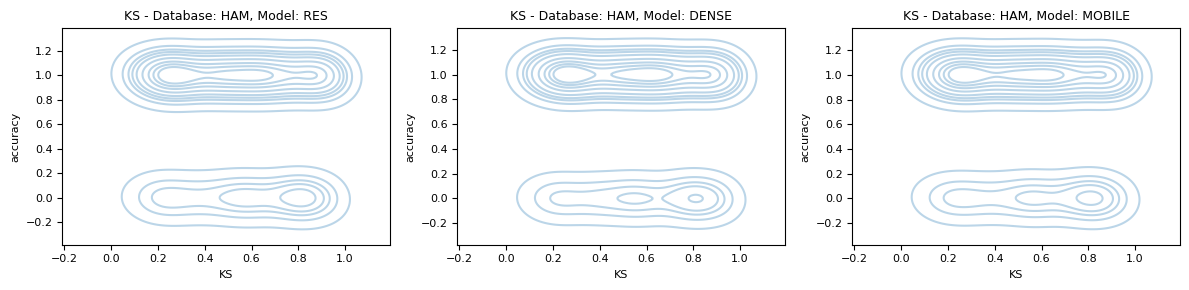

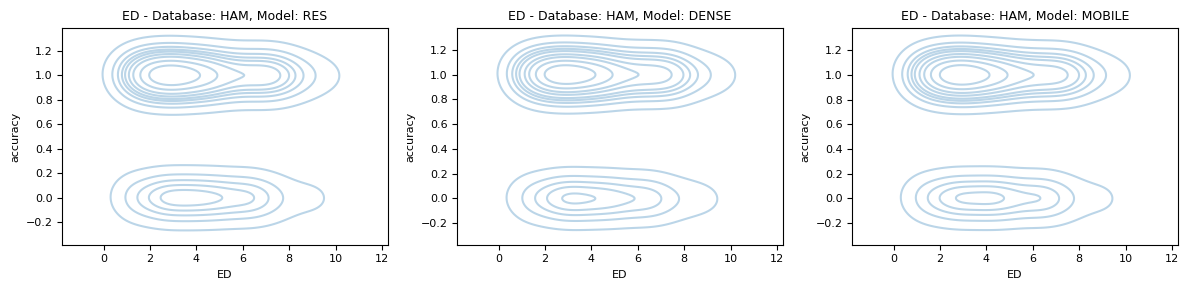

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for i in range(len(db)):
    for j in range(len(models)):
        subset = df[(df["db"] == db[i]) & (df["model"] == models[j])]
        sns.kdeplot(ax=ax[j], data=subset, x="WD", y="accuracy", alpha=0.3)
        ax[j].set_title(f'WD - Database: {db[i]}, Model: {models[j]}', fontsize=9)
        ax[j].tick_params(axis='both', labelsize=8)
        ax[j].set_xlabel("WD", fontsize=8)
        ax[j].set_ylabel("accuracy", fontsize=8)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for i in range(len(db)):
    for j in range(len(models)):
        subset = df[(df["db"] == db[i]) & (df["model"] == models[j])]
        sns.kdeplot(ax=ax[j], data=subset, x="KUIPER", y="accuracy", alpha=0.3)
        ax[j].set_title(f'KUIPER - Database: {db[i]}, Model: {models[j]}', fontsize=9)
        ax[j].tick_params(axis='both', labelsize=8)
        ax[j].set_xlabel("KUIPER", fontsize=8)
        ax[j].set_ylabel("accuracy", fontsize=8)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for i in range(len(db)):
    for j in range(len(models)):
        subset = df[(df["db"] == db[i]) & (df["model"] == models[j])]
        sns.kdeplot(ax=ax[j], data=subset, x="AD", y="accuracy", alpha=0.3)
        ax[j].set_title(f'AD - Database: {db[i]}, Model: {models[j]}', fontsize=9)
        ax[j].tick_params(axis='both', labelsize=8)
        ax[j].set_xlabel("AD", fontsize=8)
        ax[j].set_ylabel("accuracy", fontsize=8)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for i in range(len(db)):
    for j in range(len(models)):
        subset = df[(df["db"] == db[i]) & (df["model"] == models[j])]
        sns.kdeplot(ax=ax[j], data=subset, x="CVM", y="accuracy", alpha=0.3)
        ax[j].set_title(f'CVM - Database: {db[i]}, Model: {models[j]}', fontsize=9)
        ax[j].tick_params(axis='both', labelsize=8)
        ax[j].set_xlabel("CVM", fontsize=8)
        ax[j].set_ylabel("accuracy", fontsize=8)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for i in range(len(db)):
    for j in range(len(models)):
        subset = df[(df["db"] == db[i]) & (df["model"] == models[j])]
        sns.kdeplot(ax=ax[j], data=subset, x="KS", y="accuracy", alpha=0.3)
        ax[j].set_title(f'KS - Database: {db[i]}, Model: {models[j]}', fontsize=9)
        ax[j].tick_params(axis='both', labelsize=8)
        ax[j].set_xlabel("KS", fontsize=8)
        ax[j].set_ylabel("accuracy", fontsize=8)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for i in range(len(db)):
    for j in range(len(models)):
        subset = df[(df["db"] == db[i]) & (df["model"] == models[j])]
        sns.kdeplot(ax=ax[j], data=subset, x="ED", y="accuracy", alpha=0.3)
        ax[j].set_title(f'ED - Database: {db[i]}, Model: {models[j]}', fontsize=9)
        ax[j].tick_params(axis='both', labelsize=8)
        ax[j].set_xlabel("ED", fontsize=8)
        ax[j].set_ylabel("accuracy", fontsize=8)
plt.tight_layout()
plt.show()

In [28]:
for i in range(len(db)):
    for j in range(len(models)):
        subset = df[(df["db"] == db[i]) & (df["model"] == models[j])]
        subset_corr = subset[["accuracy", "WD", "KUIPER", "AD", "CVM", "KS", "ED"]].corr()
        print(subset_corr)

          accuracy        WD    KUIPER        AD       CVM        KS        ED
accuracy  1.000000 -0.153468 -0.026371 -0.205509 -0.184120 -0.064060 -0.039313
WD       -0.153468  1.000000  0.449512  0.439297  0.493313  0.561792  0.497631
KUIPER   -0.026371  0.449512  1.000000  0.794340  0.798072  0.953222  0.896252
AD       -0.205509  0.439297  0.794340  1.000000  0.983044  0.814963  0.776721
CVM      -0.184120  0.493313  0.798072  0.983044  1.000000  0.845872  0.791498
KS       -0.064060  0.561792  0.953222  0.814963  0.845872  1.000000  0.899288
ED       -0.039313  0.497631  0.896252  0.776721  0.791498  0.899288  1.000000
          accuracy        WD    KUIPER        AD       CVM        KS        ED
accuracy  1.000000 -0.139269 -0.028740 -0.193080 -0.174797 -0.059481 -0.044988
WD       -0.139269  1.000000  0.449512  0.439297  0.493313  0.561792  0.497631
KUIPER   -0.028740  0.449512  1.000000  0.794340  0.798072  0.953222  0.896252
AD       -0.193080  0.439297  0.794340  1.000000  0.

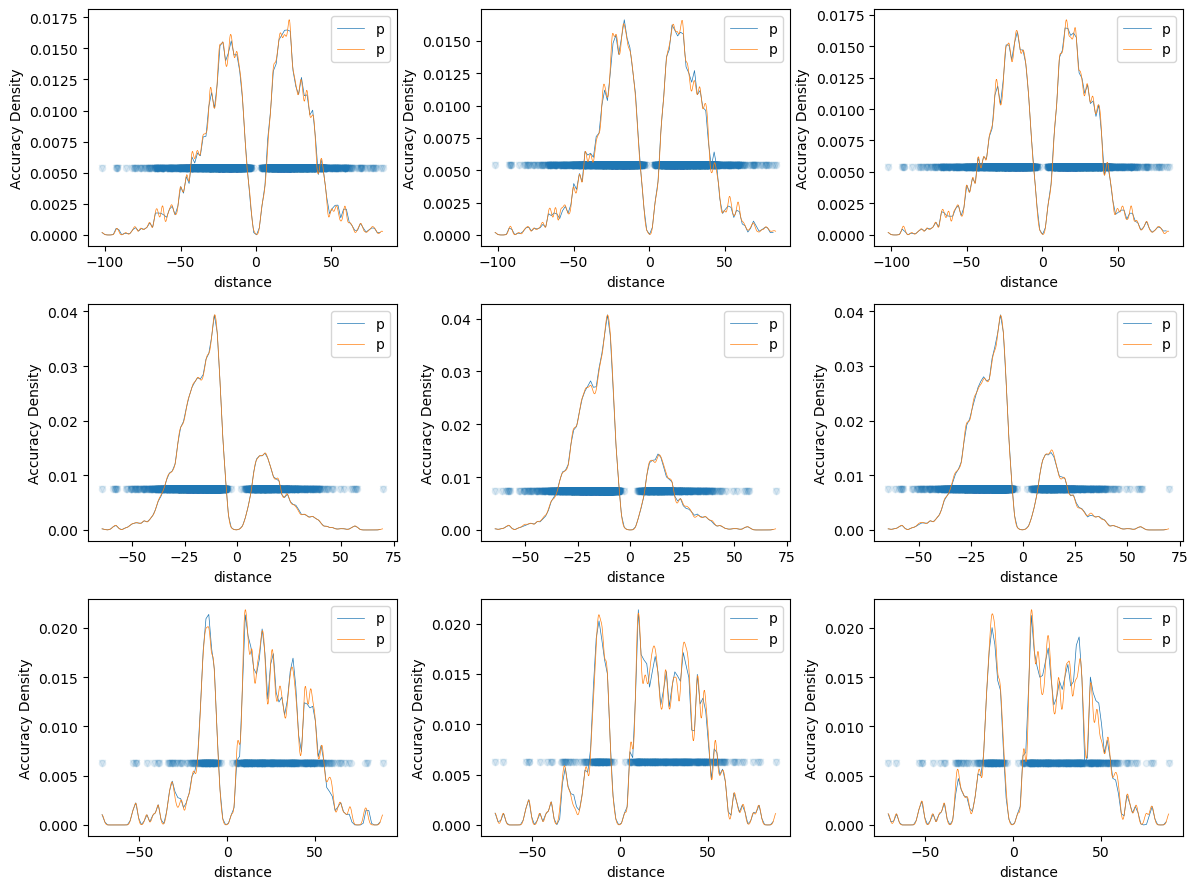

In [183]:
from sklearn.neighbors import KernelDensity

fig, ax = plt.subplots(3, 3, figsize=(12, 9))
for i in range(len(db)):
    for j in range(len(models)):
        subset = df[(df["db"] == db[i]) & (df["model"] == models[j]) & (df["accuracy"] == 1)]
        subset_post = df_post[(df_post["db"] == db[i]) & (df_post["model"] == models[j]) & (df_post["accuracy"] == 1)]
        
        kde = KernelDensity()
        positives = subset[["distance"]] # 正解データだけだから
        kde.fit(positives)
        
        # ダミーデータの最大最小値を取得
        min_distance = subset["distance"].min()
        max_distance = subset["distance"].max()
        # 最大最小値の間の幅
        diff = max_distance - min_distance
        
        # plot用X座標の値を生成
        df_X = pd.DataFrame(dict(distance=min_distance + (np.arange(100) / 100) * diff))
        
        # 各X座標の確率値を取得
        dists = kde.score_samples(df_X)
        df_for_plot = df_X.copy()
        df_for_plot["p"] = np.exp(dists)
        
        # KDEで求めた分布を表示
        ax[i, j] = df_for_plot.plot(kind="line", x="distance", y="p", ax=ax[i, j], linewidth=0.5)
        # データ位置に点を打つ
        positives_for_plot = positives.copy()
        positives_for_plot["x"] = df_for_plot["p"].mean()
        positives_for_plot.plot(kind="scatter", x="distance", y="x", marker="v", alpha=0.1, ax=ax[i, j])
        # 表示幅に少しだけ余白を持たせる
        ax[i, j].set_xlim(min_distance - diff * 0.05, max_distance + diff * 0.05)
        #ax[i, j].set_ylim(0, 0.03)
        ax[i, j].set_ylabel("Accuracy Density")

        positives = subset_post[["distance"]] # 正解データだけだから
        kde.fit(positives)
        
        # ダミーデータの最大最小値を取得
        min_distance = subset_post["distance"].min()
        max_distance = subset_post["distance"].max()
        # 最大最小値の間の幅
        diff = max_distance - min_distance
        
        # plot用X座標の値を生成
        df_X = pd.DataFrame(dict(distance=min_distance + (np.arange(1000) / 1000) * diff))
        
        # 各X座標の確率値を取得
        dists = kde.score_samples(df_X)
        df_for_plot = df_X.copy()
        df_for_plot["p"] = np.exp(dists)
        
        # KDEで求めた分布を表示
        ax[i, j] = df_for_plot.plot(kind="line", x="distance", y="p", ax=ax[i, j], linewidth=0.5)
        # データ位置に点を打つ
        positives_for_plot = positives.copy()
        positives_for_plot["x"] = df_for_plot["p"].mean()
        positives_for_plot.plot(kind="scatter", x="distance", y="x", marker="o", alpha=0.1, ax=ax[i, j])
        # 表示幅に少しだけ余白を持たせる
        ax[i, j].set_xlim(min_distance - diff * 0.05, max_distance + diff * 0.05)
        #ax[i, j].set_ylim(0, 0.03)
        ax[i, j].set_ylabel("Accuracy Density")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Accuracy Density')

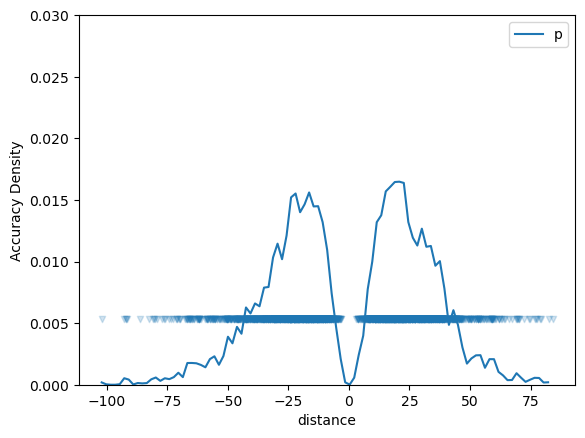

(0.0, 0.03)

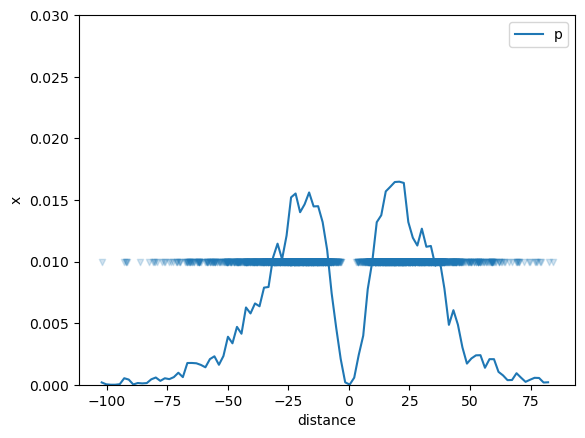

In [152]:
# KDEで求めた分布を表示
ax = df_for_plot.plot(kind="line", x="distance", y="p")
# データ位置に点を打つ
positives_for_plot = positives.copy()
positives_for_plot["x"] = 0.01
positives_for_plot.plot(kind="scatter", x="distance", y="x", marker="v", alpha=0.2, ax=ax)
# 表示幅に少しだけ余白を持たせる
ax.set_xlim(min_distance - diff * 0.05, max_distance + diff * 0.05)
ax.set_ylim(0, 0.03)